In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import seagul.envs
from scipy.linalg import solve_discrete_are, solve,inv
from seagul.rl.ars import ARSAgent
import time

%load_ext autoreload
%autoreload 2

/home/sgillen/work/seagul/seagul/envs/__init__.py:56: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")


In [2]:
#env_config = {"A":np.random.randn(3,3)}
def get_optimal_time(env_config, n_trials=200):
    env = gym.make('linear-v0',**env_config)

    if np.all(env.A == np.identity(env.A.shape[0])):
        K = np.identity(env.A.shape[0])
    else:
        G = env.A
        H = np.identity(env.A.shape[0])
        Q = env.Q
        R = env.R
        P = solve_discrete_are(G, H, Q, R)  # Ricatti
        K = solve(H.T@P@H + R, H.T@P@G)     # (B^T P B + R)*K =  B^T P A 
    
    rew_list = []
    for t in range(n_trials):
        obs = []
        rew = []
        o = env.reset()
        for i in range(env.num_steps):
            a = -K@o
            o,r,_,_ = env.step(a)
            obs.append(o)
            rew.append(r)

        rew_list.append(sum(rew))
        
    return np.mean(rew_list)

    #print(f"optimal policy = {np.mean(rew_list)} +- {np.std(rew_list)}")

In [ ]:
n_list = [i for i in range(2,50)]
num_trials = 5
bad_list = []
mean_t_list = []
std_t_list = []
mean_step_list = []
std_step_list = [] 

max_steps = 10000

for n in n_list:
    t_list = [] 
    step_list = []
    
    env_config = {"A":np.identity(n),"num_steps":25, 'act_limit':1}
    optimal_reward = get_optimal_time(env_config)

    for trial in range(num_trials):
        print(f"n = {n}, opt = {optimal_reward}")
        start = time.time()
        agent = ARSAgent('linear-v0',seed=trial, n_workers=16, env_config=env_config, 
                         reward_stop = 1.1*optimal_reward, step_schedule=[.05,.001], exp_schedule=[.05, .001],
                         n_delta = 64)
        agent.learn(max_steps);
        if len(agent.lr_hist) == max_steps:
            bad_list.append(n)
            
        
        t_list.append(start - time.time())
        step_list.append(len(agent.lr_hist))
        
    mean_t_list.append(np.mean(t_list))
    std_t_list.append(np.std(t_list))
    
    mean_step_list.append(np.mean(step_list))
    std_step_list.append(np.std(step_list))

Text(0.5, 1.0, 'ARS on NxN discrete time linear system')

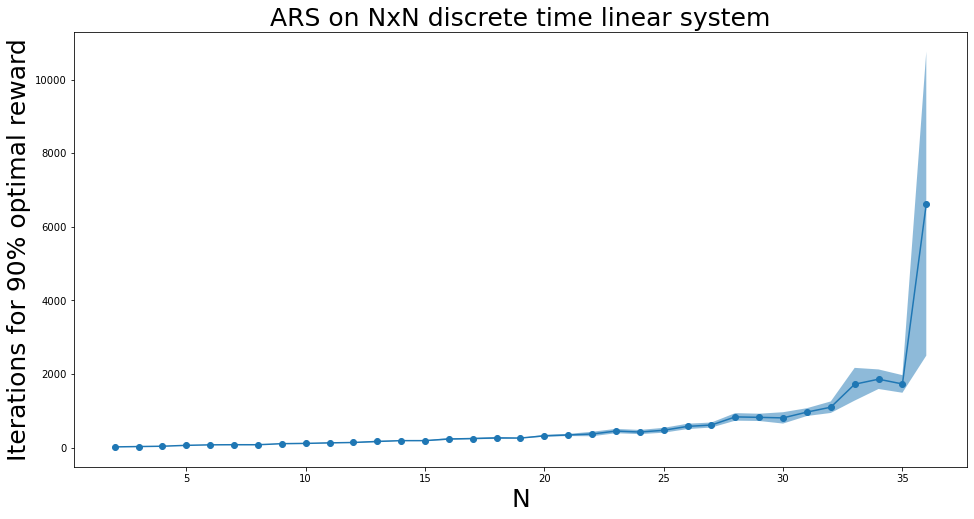

In [74]:
start = 0
stop = 35

fig, ax = plt.subplots(1, figsize=(16,8))
step_means = np.array(mean_step_list[start:stop])
step_std = np.array(std_step_list[start:stop])
ax.plot(n_list[start:stop], step_means,'o-')
ax.fill_between(n_list[start:stop], step_means[start:stop] + step_std[start:stop], step_means[start:stop] - step_std[start:stop], alpha=.5)
ax.set_xlabel('N',fontsize=25)
ax.set_ylabel('Iterations for 90% optimal reward',fontsize=25)
ax.set_title("ARS on NxN discrete time linear system", fontsize=25)


In [ ]:
obs = []
rew = []
env_config = {"A":np.identity(50),"num_steps":25, 'act_limit':1}
env = gym.make('linear-v0',**env_config)

for i in range(env.num_steps):
    a ,_,_,_= agent.model.step(o)
    o,r,_,_ = env.step(a)
    obs.append(o)
    rew.append(r)

obs = np.array(obs)
print(sum(rew))
plt.plot(obs)
plt.figure()
plt.plot(rew)

In [ ]:
del mean_t_list[2]
del mean_step_list[2]

In [ ]:
import control
control.__version__

In [ ]:
n = 40
env_config = {"A":np.identity(n),"num_steps":25, 'act_limit':1}
env_config["A"] = np.identity(n)
env = gym.make('linear-v0',**env_config)

In [ ]:
G = env.A
H = np.identity(env.A.shape[0])
Q = env.Q
R = env.R
P = solve_discrete_are(G, H, Q, R)  # Ricatti
K = solve(H.T@P@H + R, H.T@P@G)     # (B^T P B + R)*K =  B^T P A 

In [ ]:
rew_list = []
obs = []
rew = []
o = env.reset()
for i in range(env.num_steps):
    a = -np.identity(n)@o
    o,r,_,_ = env.step(a)
    obs.append(o)
    rew.append(r)

print(sum(rew))
plt.plot(obs);